<a href="https://colab.research.google.com/github/surbhishaw1602/Deep-Learning/blob/main/Mnist_Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mnist Digit classification with Neural Network


Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading Mnist Dataset from keras.dataset

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

training data=60000 image
testing data=10000 image

image dimension= 28*28



In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

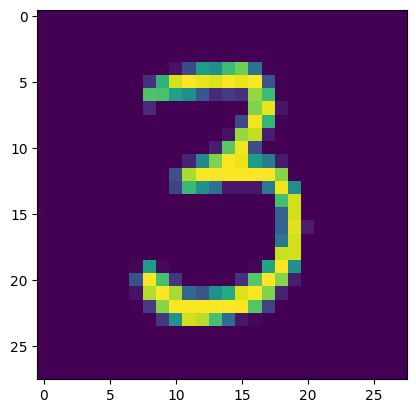

3


In [6]:
#display image

plt.imshow(X_train[50])
plt.show()

# print corresponding level
print(y_train[50])


Image Lables

In [7]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [8]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scaling the values

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Building Neural Network

In [11]:
model=keras.Sequential([

                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [13]:
#training the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8515 - loss: 0.5247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9556 - loss: 0.1486
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1073
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0853
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0699
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9823 - loss: 0.0584
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9879 - loss: 0.0414
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0353
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0309


In [14]:
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1365
0.9704999923706055


In [15]:
print(X_test.shape)

(10000, 28, 28)


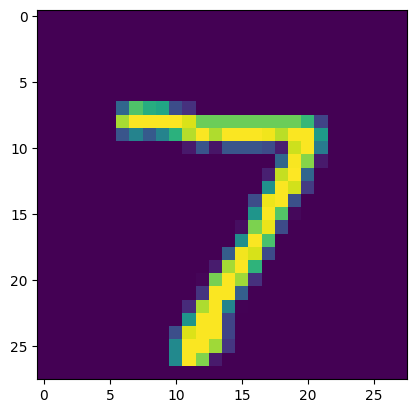

In [16]:
# first data points in test data
plt.imshow(X_test[0])
plt.show()

In [17]:
print(y_test[0])

7


In [19]:
y_pred=model.predict(X_test)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


In [20]:
print(y_pred[0])

[2.0446894e-05 1.2340599e-03 2.6045991e-03 9.3350172e-01 4.6461563e-09
 7.0595430e-05 8.5430566e-15 9.9999481e-01 1.3107273e-03 1.3242140e-01]


Model.predict() give the prediction probability of each class for that point

In [22]:
label_for_first_test=np.argmax(y_pred[0])
print(label_for_first_test)

7


In [27]:
#converting the prediction probability to class label for all test data
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test -->true labels

y_pred_labels -->predicted labels

In [30]:
conf_matrix=confusion_matrix(y_test,y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 961    1    1    0    1    0   10    1    3    2]
 [   1 1117    4    1    1    1    5    0    5    0]
 [   3    0 1013    1    0    0    3    6    6    0]
 [   0    0   12  976    1    5    2    4    6    4]
 [   1    0    9    0  948    0    6    4    4   10]
 [   3    0    1   16    2  855    6    0    8    1]
 [   3    3    1    0    3    5  943    0    0    0]
 [   2    2   10    2    0    2    1  992    6   11]
 [   6    0    6    5    2    2    4    1  945    3]
 [   4    4    0    8    9    6    2    4   17  955]], shape=(10, 10), dtype=int32)


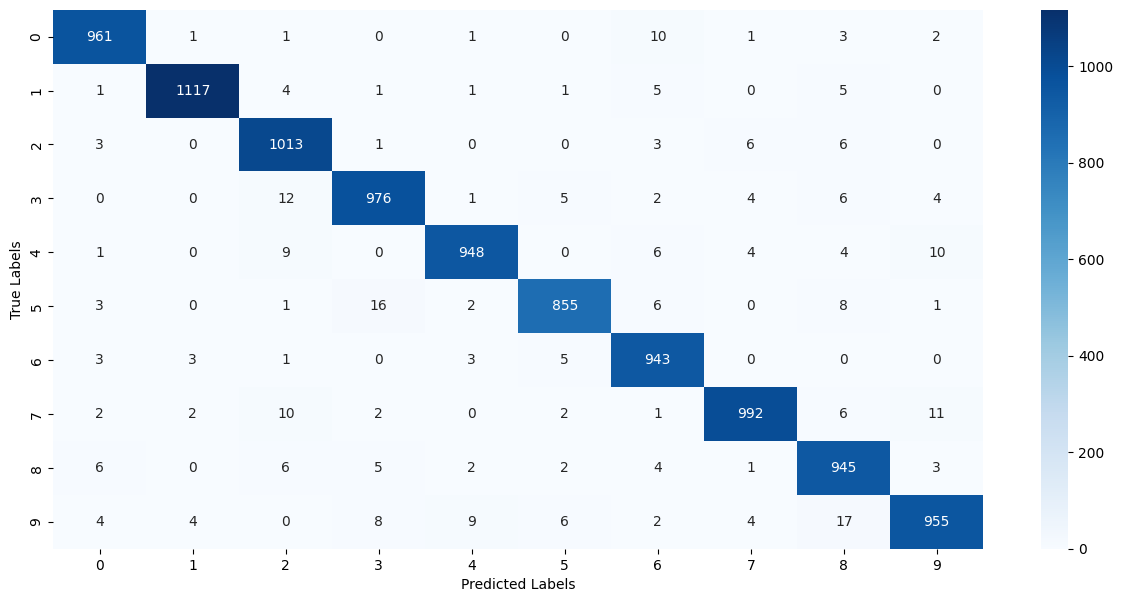

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Building a Predictive System

In [35]:
input_image_path='/content/img.png'
input_image=cv2.imread(input_image_path)

In [36]:
type(input_image)

numpy.ndarray

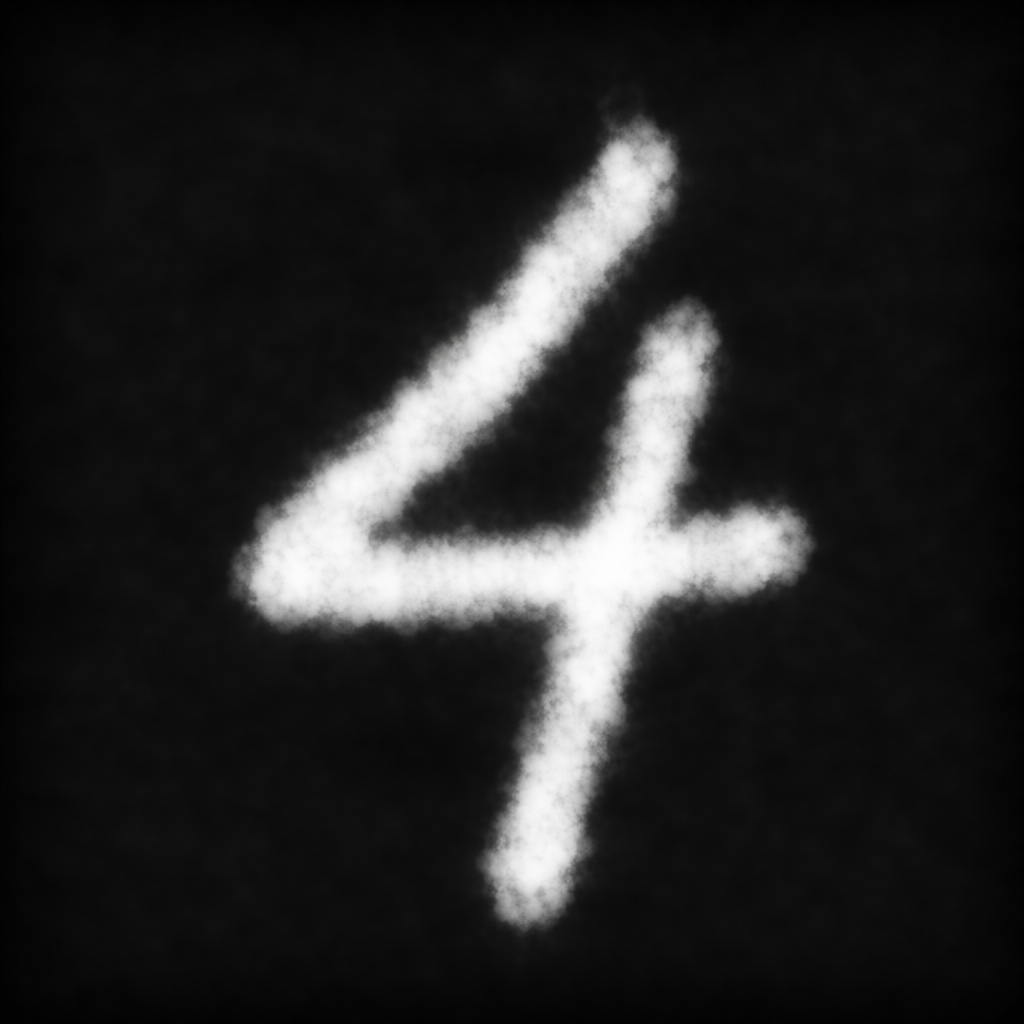

In [37]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(1024, 1024, 3)

In [41]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [42]:
grayscale.shape

(1024, 1024)

In [43]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [44]:
print(input_image_resize.shape)

(28, 28)


In [45]:
cv2_imshow(input_image_resize)

In [46]:
input_image_resize=input_image_resize/255

In [48]:
image_reshaped=np.reshape(input_image_resize,[1,28,28]) #1 because we are taking only one image

In [49]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[[2.0549106e-04 1.6164349e-05 2.3955029e-02 1.4750803e-03 9.5694160e-01
  3.0997474e-04 9.3574679e-05 3.7027918e-02 5.6762364e-02 6.0351282e-02]]


In [51]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)


4


Predictive System

Path of the image to be predicted: /content/sample_image-300x298.webp


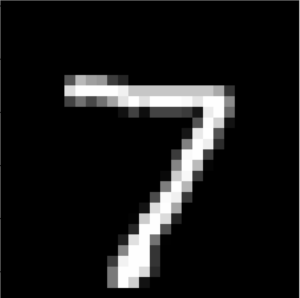

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The Handwritten Digit is recognised as  7


In [67]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ',input_pred_label )



